# Pandas

<img src="https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/images/logo.png" width=150>

在本文中，我们将学习使用Python Pandas库进行数据分析的基础知识。

<img src="https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/images/pandas.png" width=500>




# 下载数据

首先，我们要获得一些数据。我们将从下面的公共链接中下载titanic数据集。

In [12]:
import urllib

In [ ]:
# 将数据从GitHub下载到笔记本电脑的本地磁盘
url = "https://raw.githubusercontent.com/LisonEvf/practicalAI-cn/master/data/titanic.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open('titanic.csv', 'wb') as f:
    f.write(html)

In [ ]:
# 检查数据是否已下载成功
!ls -l

total 96
-rw-r--r-- 1 root root  6975 Dec 16 12:45 processed_titanic.csv
drwxr-xr-x 1 root root  4096 Dec 10 17:34 sample_data
-rw-r--r-- 1 root root 85153 Dec 16 12:46 titanic.csv


# 加载数据

现在我们有一些数据可以使用，让我们加载到Pandas数据帧（dataframe）中。Pandas是一个很棒的python数据库分析库。

In [ ]:
import pandas as pd

In [ ]:
# 从CSV读取到Pandas DataFrame
df = pd.read_csv("titanic.csv", header=0)

In [ ]:
# 前五项
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


他们有不同的特征:
* pclass: class of travel
* name: full name of the passenger
* sex: gender
* age: numerical age
* sibsp: # of siblings/spouse aboard
* parch: number of parents/child aboard
* ticket: ticket number
* fare: cost of the ticket
* cabin: location of room
* emarked: port that the passenger embarked at (C - Cherbourg, S - Southampton, Q = Queenstown)
* survived: survial metric (0 - died, 1 - survived)

# 探索性分析

我们将使用Pandas库，看看如何探索和处理我们的数据。

In [18]:
# 描述性统计
df["age"].describe()

,age
count,1046.000000
mean,29.881135
std,14.413500
min,0.166700
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


<Axes: >

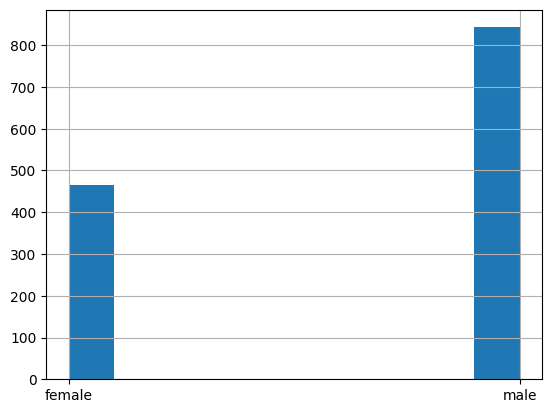

In [17]:
# 直方图
df["sex"].hist()

In [15]:
# 唯一值
df["embarked"].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [ ]:
# 根据特征选择数据
df["name"].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [ ]:
# 筛选
df[df["sex"]=="female"].head() # 只有女性数据出现

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


In [ ]:
# 排序
df.sort_values("age", ascending=False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


In [ ]:
# Grouping（数据聚合与分组运算）
sex_group = df.groupby("survived")
sex_group.mean()

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


In [ ]:
# iloc根据位置的索引来访问
df.iloc[0, :] # iloc在索引中的特定位置获取行（或列）（因此它只需要整数）

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

In [ ]:
# 获取指定位置的数据
df.iloc[0, 1]


'Allen, Miss. Elisabeth Walton'

In [ ]:
# loc根据标签的索引来访问
df.loc[0] # loc从索引中获取具有特定标签的行（或列）

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

# 预处理

In [ ]:
# 具有至少一个NaN值的行
df[pd.isnull(df).any(axis=1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [ ]:
# 删除具有Nan值的行
df = df.dropna() # 删除具有NaN值的行
df = df.reset_index() # 重置行索引
df.head()

,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [ ]:
# 删除多行
df = df.drop(["name", "cabin", "ticket"], axis=1) # we won't use text features for our initial basic models
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,1
2,2,1,female,2.0000,1,2,151.5500,S,0
3,3,1,male,30.0000,1,2,151.5500,S,0
4,4,1,female,25.0000,1,2,151.5500,S,0


In [ ]:
# 映射特征值
df['sex'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df["embarked"] = df['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,0,29.0000,0,0,211.3375,0,1
1,1,1,1,0.9167,1,2,151.5500,0,1
2,2,1,0,2.0000,1,2,151.5500,0,0
3,3,1,1,30.0000,1,2,151.5500,0,0
4,4,1,0,25.0000,1,2,151.5500,0,0


# 特征工程

In [ ]:
# lambda表达式创建新特征
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

df["family_size"] = df[["sibsp", "parch"]].apply(lambda x: get_family_size(x["sibsp"], x["parch"]), axis=1)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived,family_size
0,0,1,0,29.0000,0,0,211.3375,0,1,0
1,1,1,1,0.9167,1,2,151.5500,0,1,3
2,2,1,0,2.0000,1,2,151.5500,0,0,3
3,3,1,1,30.0000,1,2,151.5500,0,0,3
4,4,1,0,25.0000,1,2,151.5500,0,0,3


In [ ]:
# 重新组织标题
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'fare', 'embarked', 'survived']]
df.head()

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0,1
1,1,1,0.9167,1,2,3,151.5500,0,1
2,1,0,2.0000,1,2,3,151.5500,0,0
3,1,1,30.0000,1,2,3,151.5500,0,0
4,1,0,25.0000,1,2,3,151.5500,0,0


# 保存数据

In [ ]:
# 保存数据帧（dataframe）到 CSV
df.to_csv("processed_titanic.csv", index=False)

In [ ]:
# 看你一下你保持的文件
!ls -l

total 96
-rw-r--r-- 1 root root  6975 Dec 16 12:46 processed_titanic.csv
drwxr-xr-x 1 root root  4096 Dec 10 17:34 sample_data
-rw-r--r-- 1 root root 85153 Dec 16 12:46 titanic.csv
